<a href="https://colab.research.google.com/github/YuliiaMan/python_for_ds_tasks/blob/main/Additional_hw_4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Додаткове завдання з pandas
Вітаю! В цьому завданні будемо працювати з даними з опитування щодо зарплат ІТ спеціалістів на рексурсі DOU від грудня 2022 року. Впевнена, це буде цікаве дослідження, а заразом і практика pandas :)
Цей аналіз може бути корисним людині, яка обирає напрям роботи в ІТ і хоче зрозуміти тенденції. За якісного виконання цього аналізу, цей проєкт можна сміливо додавати у Ваше портфоліо!

1. Зчитайте дані з файлу `2022_dec_raw.csv`. Увага! Тут необхідно використати аргумент `pd.read_csv` `sep=';'`, бо розділювач в даних - крапка з комою.

In [2]:
import pandas as pd


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_path = '/content/drive/MyDrive/datastat/2022_dec_raw.csv'
df = pd.read_csv(data_path, sep=';')

2. Які колонки мають дані?

In [5]:
df.columns.tolist()

['Timestamp',
 'Ви працюєте зараз в ІТ?',
 'Де ви зараз живете? ',
 'В якій області ви зараз живете?',
 'Зарплата у $$$ за місяць, лише ставка після сплати податків',
 'Ваша стать',
 'Ваш вік',
 'Яка у вас освіта?',
 'Чи є у вас науковий ступінь? ',
 'Знання англійської мови',
 'Оберіть вашу посаду',
 'Ваш тайтл',
 'Ваша спеціалізація',
 'Вкажіть вашу спеціалізацію',
 'Оберіть вашу спеціалізацію',
 'Ваша посада',
 'Оберіть вашу посаду2',
 'Ваша посада3',
 'Ваша посада4',
 'Ваша посада5',
 'Ваша посада6',
 'Ваша посада7',
 'Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?',
 'Основна мова програмування',
 'Вкажіть вашу основну спеціалізацію',
 'В якій сфері працюєте?',
 'Тип компанії',
 'Загальний стаж роботи за спеціальністю']

3. Скільки рядків та колонок мають дані? Скільки пропущених значень має кожна з колонок?

In [6]:
df.shape

(13315, 28)

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

Timestamp                                                                         0
Ви працюєте зараз в ІТ?                                                           0
Де ви зараз живете?                                                               0
В якій області ви зараз живете?                                                1777
Зарплата у $$$ за місяць, лише ставка після сплати податків                      27
Ваша стать                                                                        0
Ваш вік                                                                           0
Яка у вас освіта?                                                                 0
Чи є у вас науковий ступінь?                                                    111
Знання англійської мови                                                           0
Оберіть вашу посаду                                                               0
Ваш тайтл                                                                   

4. Які колонки мають всі значення заповненими (не мають дожного None значення)? Виведіть програмно список цих колонок.

In [8]:
fully_filled_columns = df.columns[df.notnull().all()].tolist()

fully_filled_columns

['Timestamp',
 'Ви працюєте зараз в ІТ?',
 'Де ви зараз живете? ',
 'Ваша стать',
 'Ваш вік',
 'Яка у вас освіта?',
 'Знання англійської мови',
 'Оберіть вашу посаду',
 'Ваш тайтл',
 'В якій сфері працюєте?',
 'Тип компанії',
 'Загальний стаж роботи за спеціальністю']

5. Який тип мають колонки в наборі даних? Які з колонок типу object логічно на ваш погляд перетворити на числові колонки?

In [9]:
column_types = df.dtypes
print("Типи колонок у наборі даних:")
print(column_types)

Типи колонок у наборі даних:
Timestamp                                                                     object
Ви працюєте зараз в ІТ?                                                       object
Де ви зараз живете?                                                           object
В якій області ви зараз живете?                                               object
Зарплата у $$$ за місяць, лише ставка після сплати податків                   object
Ваша стать                                                                    object
Ваш вік                                                                       object
Яка у вас освіта?                                                             object
Чи є у вас науковий ступінь?                                                  object
Знання англійської мови                                                       object
Оберіть вашу посаду                                                           object
Ваш тайтл                           

In [10]:
object_columns = df.select_dtypes(include=['object']).columns
print("\nКолонки типу object:")
print(object_columns)


Колонки типу object:
Index(['Timestamp', 'Ви працюєте зараз в ІТ?', 'Де ви зараз живете? ',
       'В якій області ви зараз живете?',
       'Зарплата у $$$ за місяць, лише ставка після сплати податків',
       'Ваша стать', 'Ваш вік', 'Яка у вас освіта?',
       'Чи є у вас науковий ступінь? ', 'Знання англійської мови',
       'Оберіть вашу посаду', 'Ваш тайтл', 'Ваша спеціалізація',
       'Вкажіть вашу спеціалізацію', 'Оберіть вашу спеціалізацію',
       'Ваша посада', 'Оберіть вашу посаду2', 'Ваша посада3', 'Ваша посада4',
       'Ваша посада5', 'Ваша посада6', 'Ваша посада7',
       'Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?',
       'Основна мова програмування', 'Вкажіть вашу основну спеціалізацію',
       'В якій сфері працюєте?', 'Тип компанії',
       'Загальний стаж роботи за спеціальністю'],
      dtype='object')


In [11]:
convertible_columns = []
for col in object_columns:
    try:
        pd.to_numeric(df[col])
        convertible_columns.append(col)
    except ValueError:
        pass

print(convertible_columns)

[]


Колонки типу object, які можна перетворити на числові, відсутні в датасеті.

6. Трансформуйте колонки 'Ваш вік', 'Зарплата у $$$ за місяць, лише ставка після сплати податків' у тип даних float. УВАГА! Перед трансформацією подивіться, які дані містять ці колонки. Аби успішно трансформувати тип даних, треба спочатку привести рядки до того виду, який буде підходити, аби потім рядок зробити типом float.

In [12]:
import numpy as np

In [13]:
print("Унікальні значення в колонці 'Ваш вік':")
print(df['Ваш вік'].unique())
print("\nУнікальні значення в колонці 'Зарплата у $$$ за місяць, лише ставка після сплати податків':")
print(df['Зарплата у $$$ за місяць, лише ставка після сплати податків'].unique())

Унікальні значення в колонці 'Ваш вік':
['29' '36' '34' '23' '33' '31' '30' '24' '27' '17' '25' '20' '26' '22'
 '19' '21' '18' '32' '35' '28' '37' '43' '44' '39' '50' '40' '38' '41'
 '45' '42' '49' '46' '47' '48' '55' '63' '58' '53' '54' '51' '56' '60'
 '16' '57' '29,5' '52' '14']

Унікальні значення в колонці 'Зарплата у $$$ за місяць, лише ставка після сплати податків':
['4000' nan '2500' '500' '2800' '5500' '1400' '1200' '650' '6000' '6600'
 '850' '1000' '1500' '3000' '800' '700' '1100' '7500' '10600' '3300'
 '5000' '2400' '1800' '2100' '4500' '2600' '3600' '3525' '1600' '3200'
 '570' '6500' '4200' '1700' '5320' '5300' '1490' '1250' '2700' '4700'
 '1300' '400' '2000' '1577' '10000' '550' '5600' '950' '3550' '4750'
 '2200' '1850' '5200' '3040' '5100' '2250' '6450' '3500' '1900' '4400'
 '2865' '5350' '3700' '2850' '6150' '680' '2169' '1350' '2222' '2185'
 '2750' '3760' '2300' '200' '4275' '7700' '978' '1710' '1170' '3100'
 '5700' '1863' '2900' '3135' '3400' '4300' '730' '8500' '2240' 

In [14]:
df['Ваш вік'] = df['Ваш вік'].replace('-', np.nan)  # Замінити "-" на NaN
df['Ваш вік'] = pd.to_numeric(df['Ваш вік'], errors='coerce')  # Перетворення в числа

In [15]:
df['Зарплата у $$$ за місяць, лише ставка після сплати податків'] = (
    df['Зарплата у $$$ за місяць, лише ставка після сплати податків']
    .astype(str)  # Примусово перетворюємо значення в строки
    .str.replace('[\$,]', '', regex=True)  # Видаляємо символи "$" і коми
    .replace('-', np.nan)  # Замінюємо "-" на NaN
    .replace('None', np.nan)  # Замінюємо "None" на NaN
    .astype(float)  # Перетворюємо в числа
)

In [16]:
print("\nТипи даних після перетворення:")
print(df[['Ваш вік', 'Зарплата у $$$ за місяць, лише ставка після сплати податків']].dtypes)
print("\nПеретворені дані:")
print(df[['Ваш вік', 'Зарплата у $$$ за місяць, лише ставка після сплати податків']].head())


Типи даних після перетворення:
Ваш вік                                                        float64
Зарплата у $$$ за місяць, лише ставка після сплати податків    float64
dtype: object

Перетворені дані:
   Ваш вік  Зарплата у $$$ за місяць, лише ставка після сплати податків
0     29.0                                             4000.0          
1     36.0                                                NaN          
2     34.0                                             2500.0          
3     23.0                                              500.0          
4     33.0                                             2800.0          


7. Це завдання з зірочкою! Нам треба транфсформувати колонку Timestamp у тип даних `datetime64[ns]`. Це не так просто як здається на першйий погляд :) Але це реальна ситуація, яка може трапитись при зборі даних в роботі аналітиком.
Я запропоную один зі способів виконати завдання, але ви можете написати по-своєму. Головне - отримати колонку - потрібного типу.
Пропоную наступний алгоритм дій:
    1. Подивитись, які дані містяться в цій колонці. Виведіть перші і останні 5 записів. Чи однаковий формат цих даних? (спойлер: ні, бо інакше все було б просто :))
    2. Нам треба враховуючи різний формат даних перетворити рядок у колонці `Timestamp` на тип `datetime64[ns]`. Як це зробити? Для перетворення рядка на `datetime64` пропоную скористатись `datetime.datetime.strptime`.
    Для цього треба імпортувати бібліотеку `datetime`. Я пропоную написати функцію для обробки кожного окремого рядка, яка враховує довжину рядка і на основі цього застосовує різний формат даних дати.
    Як прописувати формат даних можна переглянути [тут](https://www.w3schools.com/python/python_datetime.asp).
    3. Коли функція для обробки кожного окремого рядка готова, застосуйте її для всіх даних з допомогою методу `apply`.

In [19]:
print(df['Timestamp'].head())
print(df['Timestamp'].tail())

0    11.30.2022 10:26:37
1    11.30.2022 10:26:39
2    11.30.2022 10:26:58
3    11.30.2022 10:27:31
4    11.30.2022 10:27:34
Name: Timestamp, dtype: object
13310    01.09.2023 11:01
13311    01.09.2023 11:14
13312    01.09.2023 11:19
13313    01.09.2023 11:28
13314    01.09.2023 11:38
Name: Timestamp, dtype: object


In [20]:
from datetime import datetime

In [21]:
def convert_to_datetime(timestamp):
    try:
        # Перевіряємо довжину рядка
        if len(timestamp) == 19:  # Формат YYYY-MM-DD HH:MM:SS
            return datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S')
        elif len(timestamp) == 10:  # Формат YYYY-MM-DD
            return datetime.strptime(timestamp, '%Y-%m-%d')
        else:
            return None  # Якщо формат не розпізнано, повертаємо None
    except Exception as e:
        print(f"Помилка з рядком: {timestamp}, {e}")
        return None

In [22]:
df['Timestamp'] = df['Timestamp'].apply(convert_to_datetime)

print(df['Timestamp'].dtype)

Выходные данные были обрезаны до нескольких последних строк (5000).
Помилка з рядком: 11.30.2022 12:37:46, time data '11.30.2022 12:37:46' does not match format '%Y-%m-%d %H:%M:%S'
Помилка з рядком: 11.30.2022 12:37:53, time data '11.30.2022 12:37:53' does not match format '%Y-%m-%d %H:%M:%S'
Помилка з рядком: 11.30.2022 12:37:53, time data '11.30.2022 12:37:53' does not match format '%Y-%m-%d %H:%M:%S'
Помилка з рядком: 11.30.2022 12:37:57, time data '11.30.2022 12:37:57' does not match format '%Y-%m-%d %H:%M:%S'
Помилка з рядком: 11.30.2022 12:38:25, time data '11.30.2022 12:38:25' does not match format '%Y-%m-%d %H:%M:%S'
Помилка з рядком: 11.30.2022 12:38:32, time data '11.30.2022 12:38:32' does not match format '%Y-%m-%d %H:%M:%S'
Помилка з рядком: 11.30.2022 12:38:45, time data '11.30.2022 12:38:45' does not match format '%Y-%m-%d %H:%M:%S'
Помилка з рядком: 11.30.2022 12:39:14, time data '11.30.2022 12:39:14' does not match format '%Y-%m-%d %H:%M:%S'
Помилка з рядком: 11.30.2022

8. Для колонок типу даних object (які такими лишились після всіх наших трансформацій) виведіть кількість унікальних значень.

In [23]:
object_columns = df.select_dtypes(include='object')

unique_counts = object_columns.nunique()

print(unique_counts)

Timestamp                                                                        0
Ви працюєте зараз в ІТ?                                                          5
Де ви зараз живете?                                                              2
В якій області ви зараз живете?                                                 23
Ваша стать                                                                       2
Яка у вас освіта?                                                                5
Чи є у вас науковий ступінь?                                                     3
Знання англійської мови                                                          5
Оберіть вашу посаду                                                             22
Ваш тайтл                                                                       10
Ваша спеціалізація                                                               8
Вкажіть вашу спеціалізацію                                                       4
Обер

9. Для колонок типу даних object виведіть топ 10 найбільш частих значень з кількістю рядків, в яких це значення зустрічається. Зробіть це для кожної колонки окремо. Наприклад, в циклі.  
Що цікавого бачите? Які висновки можна зробити? Що особисто Вас вразило?

In [24]:
object_columns = df.select_dtypes(include='object')

In [25]:
for column in object_columns.columns:
    print(f"Топ-10 значень для колонки '{column}':")
    print(df[column].value_counts().head(10))
    print("-" * 40)

Топ-10 значень для колонки 'Timestamp':
Series([], Name: count, dtype: int64)
----------------------------------------
Топ-10 значень для колонки 'Ви працюєте зараз в ІТ?':
Ви працюєте зараз в ІТ?
Так, працюю full-time      12643
Ні, тимчасово не працюю      380
Так, працюю part-time        152
Так, я фрилансер             115
Інше                          25
Name: count, dtype: int64
----------------------------------------
Топ-10 значень для колонки 'Де ви зараз живете? ':
Де ви зараз живете? 
В Україні                                                      11587
За кордоном (переїхали через війну, але планую повернутися)     1728
Name: count, dtype: int64
----------------------------------------
Топ-10 значень для колонки 'В якій області ви зараз живете?':
В якій області ви зараз живете?
Київ чи область                4411
Львів чи область               2353
Дніпро чи область               751
Івано-Франківськ чи область     478
Вінниця чи область              447
Одеса чи область    

10. Виведіть медіанну (медіана - це значення, менше якого є рівно 50% вибірки і більше якого є теж рівно 50% вибірки)
ЗП (Зарплата у $$$) для кожного рівня знання англійської. Які висновки можна зробити?

In [28]:
salary_col = 'Зарплата у $$$ за місяць, лише ставка після сплати податків'
english_col = 'Знання англійської мови'

median_salaries = df.groupby(english_col)[salary_col].median()


print(median_salaries)

Знання англійської мови
Advanced              3500.0
Elementary            1155.0
Intermediate          2150.0
Pre-Intermediate      1416.5
Upper-Intermediate    3300.0
Name: Зарплата у $$$ за місяць, лише ставка після сплати податків, dtype: float64


11. Є така штука як сортування значень категоріальної змінної. Нам це зараз стане в нагоді, адже рівні англійської можна посортувати.
Давайте відсотруємо рівні англ. і тайтли. Просто запустіть код нижче і проаналізуйте, що він робить.

In [29]:
df['Знання англійської мови'] = pd.Categorical(df['Знання англійської мови'],
                      categories=['Elementary','Pre-Intermediate','Intermediate','Upper-Intermediate','Advanced'],
                      ordered=True)

df['Ваш тайтл'] = pd.Categorical(df['Ваш тайтл'],
                      categories=['Intern/Trainee', 'Junior', 'Немає тайтлу', 'Middle', 'Senior', 'Tech Lead', 'Team Lead', 'Architect', 'Head', 'Manager'],
                      ordered=True)

12. Зробіть зводну таблицю, де стовпці - це 'Ваш тайтл', рядки - 'Знання англійської мови', а значення - медіанна ЗП. Які висновки можна зробити?
Тут ще для зручності можна зробити градієнтне забарвлення і відформатувати значення для легшого перегляду.

In [31]:
salary_col = 'Зарплата у $$$ за місяць, лише ставка після сплати податків'
title_col = 'Ваш тайтл'
english_col = 'Знання англійської мови'

pivot_table = df.pivot_table(
    index=english_col,
    columns=title_col,
    values=salary_col,
    aggfunc='median'
)

styled_table = pivot_table.style.format("${:,.0f}") \
    .background_gradient(cmap="YlGn", axis=None)

styled_table

<ipython-input-31-84b0e1a1c472>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


Ваш тайтл,Intern/Trainee,Junior,Немає тайтлу,Middle,Senior,Tech Lead,Team Lead,Architect,Head,Manager
Знання англійської мови,,,,,,,,,,
Elementary,$500,$600,$550,"$1,500","$2,500","$5,000","$2,100",$nan,"$1,500","$1,120"
Pre-Intermediate,$400,$800,$934,"$1,825","$3,500","$4,000","$2,850","$2,900","$2,400","$1,225"
Intermediate,$400,$900,"$1,300","$2,200","$4,100","$5,000","$3,800","$5,450","$3,500","$2,100"
Upper-Intermediate,$485,"$1,000","$1,600","$2,500","$4,750","$5,650","$4,655","$6,400","$4,000","$3,600"
Advanced,$500,"$1,000","$2,075","$2,500","$4,750","$6,000","$5,000","$7,000","$5,000","$4,000"


13. Виведіть результат методу describe() по колонцы розміру ЗП для топ 5 за частотою зустрічання в даних областей (В якій області ви зараз живете?). Зробіть висновки, де вигідніше жити з точки зору ЗП і чи суттєва різниця на Ваш погляд для прийняття рішення про переїзд?

In [32]:
salary_col = 'Зарплата у $$$ за місяць, лише ставка після сплати податків'
region_col = 'В якій області ви зараз живете?'

top_5_regions = df[region_col].value_counts().head(5).index

filtered_df = df[df[region_col].isin(top_5_regions)]

describe_results = filtered_df.groupby(region_col)[salary_col].describe()

print(describe_results)

                                  count         mean           std    min  \
В якій області ви зараз живете?                                             
Івано-Франківськ чи область       478.0  2705.257322   1905.673385  200.0   
Вінниця чи область                447.0  4449.897092  33266.932487  100.0   
Дніпро чи область                 751.0  2582.584554   1864.711284  100.0   
Київ чи область                  4411.0  3219.370438   5472.846882   80.0   
Львів чи область                 2353.0  3312.686358   7186.022041  150.0   

                                    25%     50%     75%       max  
В якій області ви зараз живете?                                    
Івано-Франківськ чи область      1200.0  2372.5  3775.0   12436.0  
Вінниця чи область               1300.0  2612.0  4100.0  705082.0  
Дніпро чи область                1025.0  2000.0  3600.0   12000.0  
Київ чи область                  1500.0  2800.0  4500.0  340433.0  
Львів чи область                 1375.0  2700.0  450

14. Як зростає зарплата з роками? Для цього нам треба відформатувати колонку "Загальний стаж роботи за спеціальністю" аналогічно до того, як ми це робили для колонки 'Знання англійської мови' і потім вивести медіанні значення для кількості років стажу.

In [33]:
print(df['Загальний стаж роботи за спеціальністю'].unique())

df['Загальний стаж роботи за спеціальністю'] = (
    df['Загальний стаж роботи за спеціальністю']
    .str.extract(r'(\d+)')
    .astype(float)
)

['8 років' '3 роки' '4 роки' 'Пів року' '6 років' '1,5 року' '1 рік'
 '2 роки' '5 років' '10 років' 'Менше як 3 місяці' '11 років' '7 років'
 '15 і більше років' '3 місяці' '12 років' '9 років' '14 років' '13 років']


In [34]:
salary_col = 'Зарплата у $$$ за місяць, лише ставка після сплати податків'
median_salary_by_experience = df.groupby('Загальний стаж роботи за спеціальністю')[salary_col].median()

print(median_salary_by_experience)

Загальний стаж роботи за спеціальністю
1.0     1055.0
2.0     1700.0
3.0     2090.0
4.0     3000.0
5.0     3500.0
6.0     4000.0
7.0     4250.0
8.0     4700.0
9.0     4500.0
10.0    4600.0
11.0    5000.0
12.0    4750.0
13.0    4500.0
14.0    5050.0
15.0    4500.0
Name: Зарплата у $$$ за місяць, лише ставка після сплати податків, dtype: float64


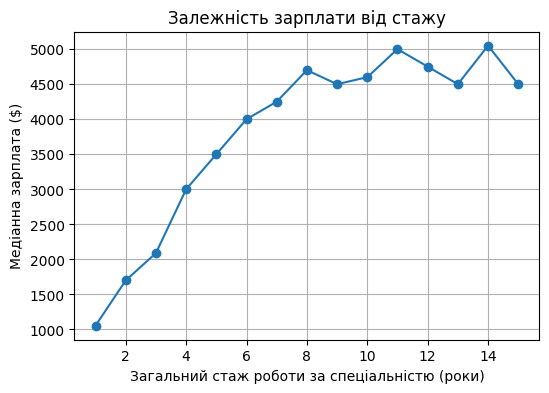

In [37]:
import matplotlib.pyplot as plt

median_salary_by_experience.plot(marker='o', figsize=(6, 4), title='Залежність зарплати від стажу')
plt.xlabel('Загальний стаж роботи за спеціальністю (роки)')
plt.ylabel('Медіанна зарплата ($)')
plt.grid()
plt.show()

Зазвичай зарплата зростає зі збільшенням стажу, але є точки, коли приріст сповільнюється.

Далі тут можна зробити багато аналогічних агрегацій, проаналізувати, в який час люди заповнювали форму, хто більше отримує, Business Analyst, чи Data Analyst. Я вас заохочувати не стримувати свій інтерес і покапати ці дані далі :)